<a href="https://colab.research.google.com/github/insooAI/TNT_2021_winter_team_1/blob/main/DACON_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 모델링
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import Sequential
from keras.layers import *

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TNT 데이터분석/train.csv',encoding='UTF-8')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TNT 데이터분석/test.csv',encoding='UTF-8')

In [ ]:
# display(train, test)

In [ ]:
# train.iloc[100,:]

id        101
digit       6
letter      D
0           2
1           0
         ... 
779         3
780         0
781         3
782         4
783         0
Name: 100, Length: 787, dtype: object

In [ ]:
print(train.shape, test.shape)

(2048, 787) (20480, 786)


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Digit(Target)')]

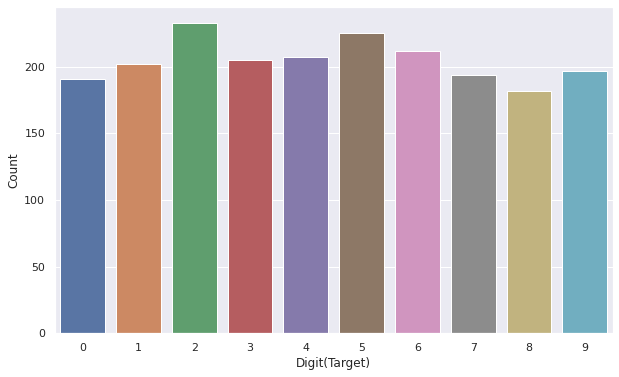

In [ ]:
# digit count
# 2가 가장 많고 그 다음으로 5가 많네
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="digit", data=train)
ax.set(xlabel='Digit(Target)', ylabel='Count')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'letter')]

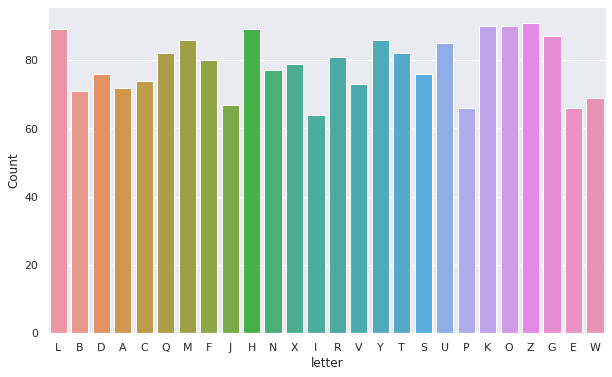

In [ ]:
# letter count
# L,H,Y,K,O,G 많네
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="letter", data=train)
ax.set(xlabel='letter', ylabel='Count')

## Preprocessing

In [ ]:
# pixel 값만 있는 데이터프레임
train2 = train.drop(['id','digit','letter'],1)
test2 = test.drop(['id','letter'],1)

In [ ]:
# shape 변환
train2 = train2.values.reshape(-1,28,28,1)
test2 = test2.values.reshape(-1,28,28,1)

In [ ]:
# train2[100]

array([[[  2],
        [  0],
        [  4],
        [  1],
        [  3],
        [  3],
        [  3],
        [  0],
        [  0],
        [  4],
        [  1],
        [  0],
        [  3],
        [  3],
        [  0],
        [  0],
        [  2],
        [  0],
        [  0],
        [  1],
        [  1],
        [  4],
        [  4],
        [  3],
        [  4],
        [  1],
        [  3],
        [  4]],

       [[  3],
        [  4],
        [  4],
        [  2],
        [  4],
        [  3],
        [  3],
        [  4],
        [  3],
        [  1],
        [  2],
        [  2],
        [  4],
        [  0],
        [  4],
        [  4],
        [  4],
        [  2],
        [  0],
        [  2],
        [  1],
        [  0],
        [  3],
        [  1],
        [  1],
        [  0],
        [  3],
        [  0]],

       [[  1],
        [  0],
        [  3],
        [  0],
        [  4],
        [  2],
        [  2],
        [  1],
        [  0],
        [  0],
      

In [ ]:
# train2_ = train2.reshape(-1,28,28)
# train2_

array([[[1, 1, 1, ..., 2, 0, 4],
        [0, 1, 3, ..., 4, 1, 3],
        [2, 0, 4, ..., 3, 3, 3],
        ...,
        [2, 1, 2, ..., 4, 1, 0],
        [3, 3, 3, ..., 3, 3, 0],
        [3, 2, 2, ..., 4, 3, 4]],

       [[0, 4, 0, ..., 1, 4, 2],
        [3, 3, 4, ..., 3, 4, 2],
        [1, 4, 2, ..., 4, 0, 4],
        ...,
        [2, 4, 4, ..., 0, 0, 1],
        [3, 1, 4, ..., 2, 2, 4],
        [2, 1, 1, ..., 2, 1, 2]],

       [[1, 1, 2, ..., 2, 4, 1],
        [1, 2, 0, ..., 2, 4, 0],
        [4, 2, 0, ..., 1, 3, 3],
        ...,
        [3, 0, 1, ..., 2, 2, 1],
        [0, 3, 2, ..., 4, 2, 3],
        [4, 4, 4, ..., 0, 2, 2]],

       ...,

       [[4, 0, 4, ..., 3, 2, 3],
        [4, 3, 1, ..., 4, 4, 4],
        [3, 2, 0, ..., 1, 3, 0],
        ...,
        [4, 0, 4, ..., 0, 2, 0],
        [4, 3, 1, ..., 0, 4, 4],
        [1, 3, 3, ..., 2, 0, 0]],

       [[2, 3, 3, ..., 0, 1, 2],
        [4, 1, 4, ..., 4, 0, 0],
        [3, 1, 3, ..., 3, 3, 3],
        ...,
        [1, 1, 4, ..., 

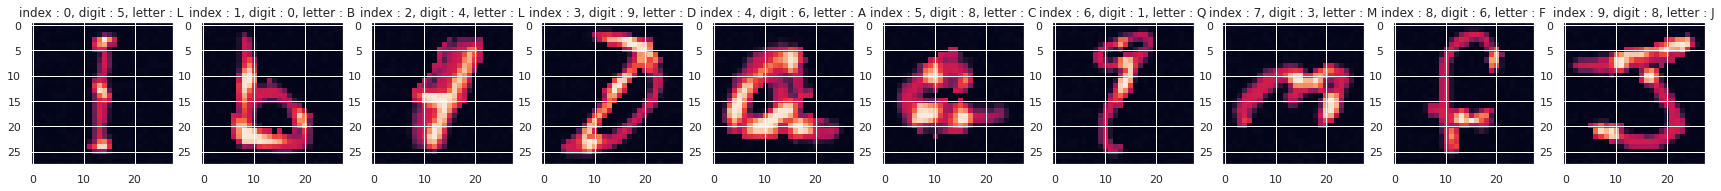

In [ ]:
# 굉장히 심오하게 들어가있네...
plt.figure(figsize=(30,4)) 
for i in range(10):
  img = train2[i].reshape(28,28)
  digit = train.loc[i,'digit']
  letter = train.loc[i,'letter']
  plt.subplot(1,10,i+1)
  plt.title('index : {0}, digit : {1}, letter : {2}'.format(i,digit,letter))
  plt.imshow(img)

### Normalize

In [ ]:
# normalize 
train2 = train2/255.0
test2 = test2/255.0

### Show augmented image data

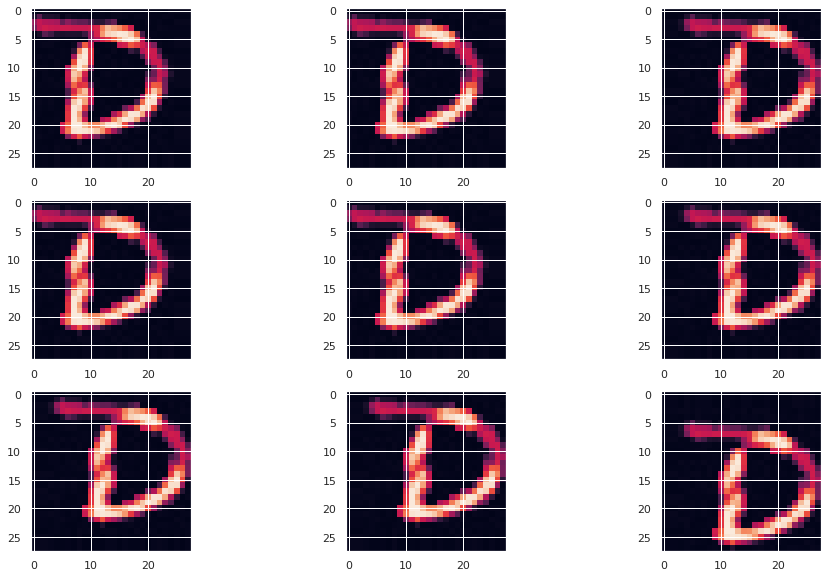

In [ ]:
sample_data = train2[100].copy()
sample = tf.expand_dims(sample_data,0) # 첫번째 차원을 추가하여 확장
sample_datagen = ImageDataGenerator(height_shift_range=(-2,2), width_shift_range=(-2,2))
sample_generator = sample_datagen.flow(sample, batch_size=1)

plt.figure(figsize=(16,10))

for i in range(9) : 
    plt.subplot(3,3,i+1)
    sample_batch = sample_generator.next()
    sample_image=sample_batch[0]
    plt.imshow(sample_image.reshape(28,28))

## Data Augmentation

In [ ]:
idg = ImageDataGenerator(height_shift_range= (-1,1) ,width_shift_range= (-1,1))
idg2 = ImageDataGenerator() #변형안하고 증대만 시킨것


# train_generator = idg.flow(x_train,y_train)
# valid_generator = idg2.flow(x_valid,y_valid)
# test_generator = idg2.flow(test2,shuffle=False)

### Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

### Modeling

In [ ]:
reLR = ReduceLROnPlateau(patience=50,verbose=1,factor=0.5)   # Learning Rate를 조절해 모델의 개선을 유도하는 콜백함수 # local minimum 빠지는 거 방지
es = EarlyStopping(patience=50, verbose=1) # 50번까지는 참겠다

val_loss_min = []
result = 0
nth = 0

In [ ]:
for train_index, valid_index in skf.split(train2,train['digit']) : # train2의 x값과 train의 y값  
                                                                   # 각 fold 안의 데이터셋의 label 분포가 전체 데이터셋의 label 분포를 따른다.
                                                                   # 인덱스값을 반환
    mc = ModelCheckpoint('best_cvision.h5',save_best_only=True, verbose=1) # file명을 저장
    
    x_train = train2[train_index]
    x_valid = train2[valid_index]    
    y_train = train['digit'][train_index]
    y_valid = train['digit'][valid_index]
    
    train_generator = idg.flow(x_train,y_train,batch_size=8) # train은 변형된 데이터
    valid_generator = idg2.flow(x_valid,y_valid)  # valid는 증대만
    test_generator = idg2.flow(test2,shuffle=False) # test도 증대만
    
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10,activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None),metrics=['acc'])
    
    learning_history = model.fit_generator(train_generator,epochs=150, validation_data=valid_generator, callbacks=[es,mc,reLR])  #  제네레이터로 생성된 배치로 학습시킬 경우에는 fit_generator() 함수를 사용
    
    # predict
    model.load_weights('best_cvision.h5')
    result += model.predict_generator(test_generator,verbose=True)/ 10  # 모델 사용 시에 제네레이터에서 제공되는 샘플을 입력할 때는 predict_generator 함수를 사용
                                                                       # 평균치 # 앙상블
    
    # save val_loss
    hist = pd.DataFrame(learning_history.history)
    val_loss_min.append(hist['val_loss'].min())
    
    nth += 1
    print(nth, '번째 학습을 완료했습니다.')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
231/231 [==============================] - 3s 9ms/step - loss: 2.8324 - acc: 0.1247 - val_loss: 3.5973 - val_acc: 0.0878

Epoch 00001: val_loss improved from inf to 3.59730, saving model to best_cvision.h5
Epoch 2/150
231/231 [==============================] - 2s 7ms/step - loss: 2.2336 - acc: 0.2296 - val_loss: 3.7337 - val_acc: 0.0976

Epoch 00002: val_loss did not improve from 3.59730
Epoch 3/150
231/231 [==============================] - 2s 7ms/step - loss: 1.9503 - acc: 0.2841 - val_loss: 3.0646 - val_acc: 0.1463

Epoch 00003: val_loss improved from 3.59730 to 3.06455, saving model to best_cvision.h5
Epoch 4/150
231/231 [==============================] - 2s 7ms/step - loss: 1.7914 - acc: 0.3606 - val_loss: 1.9388 - val_acc: 0.2976

Epoch 00004: val_loss improved from 3.06455 to 1.93876, saving model to best_cvision.h5
Epoch 5/150
231/231 [==============================] - 2s 7ms/step - loss: 1.7093 - acc: 0.3980 - val_loss: 1.6575 - val_acc: 0.4146

Epoch 00005: val_lo

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


640/640 [==============================] - 2s 2ms/step
1 번째 학습을 완료했습니다.
Epoch 1/150
231/231 [==============================] - 3s 8ms/step - loss: 2.9483 - acc: 0.1185 - val_loss: 2.9365 - val_acc: 0.1024

Epoch 00001: val_loss improved from inf to 2.93646, saving model to best_cvision.h5
Epoch 2/150
231/231 [==============================] - 2s 7ms/step - loss: 2.2114 - acc: 0.2258 - val_loss: 5.2780 - val_acc: 0.0927

Epoch 00002: val_loss did not improve from 2.93646
Epoch 3/150
231/231 [==============================] - 2s 7ms/step - loss: 2.0016 - acc: 0.2878 - val_loss: 2.1562 - val_acc: 0.2829

Epoch 00003: val_loss improved from 2.93646 to 2.15619, saving model to best_cvision.h5
Epoch 4/150
231/231 [==============================] - 2s 7ms/step - loss: 1.7060 - acc: 0.3891 - val_loss: 2.2318 - val_acc: 0.3317

Epoch 00004: val_loss did not improve from 2.15619
Epoch 5/150
231/231 [==============================] - 2s 7ms/step - loss: 1.5695 - acc: 0.4492 - val_loss: 2.3116 - v

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_108 (Bat (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_60 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_109 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_110 (Bat (None, 28, 28, 32)      

In [ ]:
val_loss_min

[0.2353811115026474,
 0.2127627432346344,
 0.20348717272281647,
 0.2011602222919464,
 0.27539747953414917,
 0.2260083705186844,
 0.1927485167980194,
 0.1468910425901413,
 0.2522128224372864,
 0.3361721932888031]

In [ ]:
np.mean(val_loss_min)

0.22822216749191285

In [ ]:
# History.history 속성은 연속된 세대에 걸친 학습 손실 값과 측정항목 값, 그리고 (적용 가능한 경우) 검증 손실 값과 검증 측정항목 값의 기록입니다
# learning_history.history

In [ ]:
hist

,loss,acc,val_loss,val_acc,lr
0,2.660114,0.148261,3.231274,0.100244,0.002
1,2.160401,0.240390,5.974963,0.100244,0.002
2,1.936750,0.317877,2.421123,0.283619,0.002
3,1.776776,0.375229,1.595340,0.427873,0.002
4,1.562690,0.456376,1.824225,0.427873,0.002
...,...,...,...,...,...
133,0.172288,0.940207,0.400791,0.902200,0.002
134,0.147374,0.949359,0.426211,0.894866,0.002
135,0.152774,0.953630,0.416582,0.897310,0.002
136,0.144334,0.955461,0.398039,0.907090,0.002


In [ ]:
print(result.argmax(1)) # 예측치
print('-')
print(len(result))

[6 9 8 ... 6 3 0]
-
20480


## 정리 
- test set 에는 digit이 없으므로 직접적인 acc 못 구함
- 1. shift_range = (-1,1) / 5 fold / epoch = 200 / patience = 50 ... val_loss_min 평균 : 0.26719099581241607
- 2. shift_range = 0.1 / 5 fold / epoch =500 / patience = 50 ... val_loss_min 평균 : 0.3245182693004608
- 3. shift_range = (-1,1) / 10 fold / epoch = 150 / patience = 50 ... 
val_loss_min 평균 : 0.22822216749191285